In [2]:
import timm

In [3]:
from fastai.vision.widgets import *
from fastcore.all import *
from time import sleep
from fastai.vision.all import *

In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
from IPython.core.pylabtools import figsize 
import shutil

In [6]:
path = Path('train')

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2),
    get_y=parent_label,
    item_tfms = [Resize(192, method='crop')],
).dataloaders(path, bs=32)

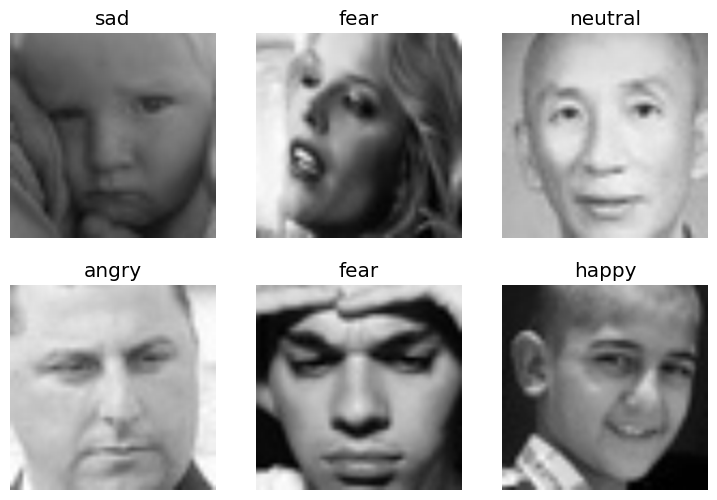

In [7]:
dls.show_batch(max_n=6)

In [8]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [9]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to C:\Users\Trident/.cache\torch\hub\checkpoints\convnext_tiny_22k_224.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.295710,1.091347,0.404267,59:25


epoch,train_loss,valid_loss,error_rate,time
0,1.082985,0.990469,0.378439,6:13:07
1,0.908961,0.906613,0.333708,6:17:09


In [10]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.997957,0.989491,0.368894,56:25


epoch,train_loss,valid_loss,error_rate,time
0,0.910027,0.928461,0.337638,6:24:01
1,0.797091,0.896980,0.327906,6:27:14
2,0.665870,0.891472,0.321355,6:19:25


In [11]:
# learn.export(fname='resnet18_emotion_detection1.pkl')
learn.export(fname='convnext_tiny_in22_emotion_detection1.pkl')

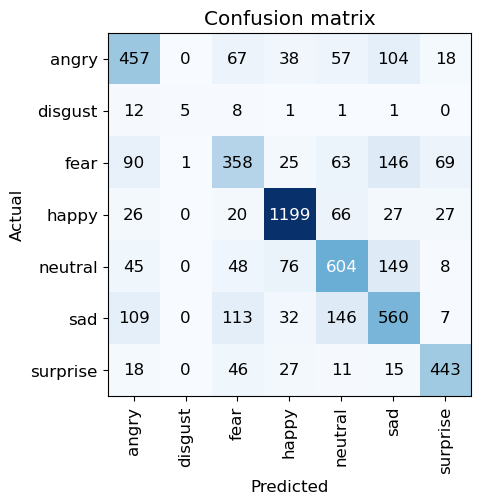

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

In [8]:
learn = load_learner('convnext_tiny_in22_emotion_detection1.pkl')

In [14]:
p = 'images5_48.jpg'
img_in = Image.open(p)
p = np.array(img_in)

In [10]:
p = PILImage.create(p)
type(p)

fastai.vision.core.PILImage

Emotion detected is : sad.
Probability that it's sad: 0.7957
Probabilities: TensorBase([4.6913e-02, 2.5132e-05, 1.1440e-01, 3.7627e-05, 4.2881e-02, 7.9565e-01, 8.7155e-05])


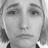

In [19]:
is_emotion,_,probs = learn.predict(p)
print(f"Emotion detected is : {is_emotion}.")
print(f"Probability that it's {is_emotion}: {max(probs):.4f}")
print(f"Probabilities: {probs}")
(img_in).to_thumb(48,48)